# 통계

Last updated 20200921MON0000

## 목표


## 목차
* S.2 변수의 성격
* S.3 샘플링
* S.4 균등분포
* S.5 정규분표

* S.6 central tendency and spread
* S.7 variability
* S.8 Z score
* S.9 outlier
Kolmogorov-Smirnov 검증
문제 S-3: 평균, 표준편차와 같은 기본 통계 값을 구한다.
ANOVA
* Chi
* S.10 상관관계
* S.10.1 상관관계 방향과 강도
* S.10.2 그래프
* S.10.3 상관관계 식
* S.4.2 데이터
* S.4.3 평균 계산
* S.4.4 분산 계산
* S.4.5 numpy 공분산 계산
* S.4.6 sklearn
* S.4.7 zscore를 이용한 상관관계
* S.5 함수로 만들어 보기
* S.6 상관관계 표
* S.7 Iris


In [ ]:
Chi square???

## S.2 변수의 성격

변수는 크게 나누어 **숫자**, **문자** 값으로 구분할 수 있다.
숫자 값은 정수나 소수로 표현되고, 년봉, 매출액, 관객수와 같이 '크다' 또는 '작다' 하는 의미가 있다.

**명목변수 Categorical or nominal varaible**는 남녀 성별과 같이 **순서가 없이** 이름이 있는 변수를 말한다.
자동차 색과 같이 검은색, 흰색, 파란색이 예가 된다. 사는 지역의 도별 인구수를 계산하는 경우, 종로구, 영등포구 등 구를 명목변수라고 한다.

**순위변수 Ordinal variable**은 어떤 **순서가 있는** 범주에 속하여 그 범주의 이름을 말한다.
'초등학고', '중학교', '고등학교', '대학교'와 같이 구분하여 붙인 이름이 예가 되고, 하위 학교를 마치고 나면 다음 등급으로 진학하는 순서가 있다.
소득수준을 '차상위', '중위', '상위'로 구분하면 **순위변수**에 해당된다.

여기서 범주를 **등간격**으로 **간격변수 Internal variable**이라고 한다.
자신의 느낌을 '좋다', '보통', '안좋다' 로 범주화하는 경우이다.

키, 몸무게와 같이 **연속 변수 Continuous variable**이 있다.

## S.3 샘플링

### 무작위 수
무작위 데이터를 생성해 보자.
무작위 수는 random 모듈을 사용해서 생성할 수 있다.

In [14]:
import random

그러나 random은 완전하게 무작위 수를 생성하지 않는다.
randmo.seed() 함수에 수를 넣으면 이 를 기반으로 무작위 수를 생성하지만, 전과 동일한 수가 생성된다.
seed 수를 주지 않으면 운영체제 시간을 사용하므로 무작위 수를 생성하게 된다.

In [2]:
#random.seed()
random.seed(3)
print("1st random number on the basis of the seed {}".format(random.random()))
print("2nd random number on the basis of the seed {}".format(random.random()))

1st random number on the basis of the seed 0.23796462709189137
2nd random number on the basis of the seed 0.5442292252959519


다시 한 번 동일한 seed를 제공하고 무작위 수를 생성하면 이전의 수와 동일한 무작위 수가 생성된다.

In [3]:
#random.seed()
random.seed(3)
print("1st random number on the basis of the seed {}".format(random.random()))
print("2nd random number on the basis of the seed {}".format(random.random()))

1st random number on the basis of the seed 0.23796462709189137
2nd random number on the basis of the seed 0.5442292252959519


### 무작위 배열

이번에는 numpy를 사용하여 무작위 배열을 생성해 보자.
numpy는 공학계산에 많이 사용되는 라이브러리로서
```import numpy as np```로 numpy를 np라는 이름으로 사용하자.

In [6]:
import numpy as np

numpy의 random() 함수에 행과 열에 해당하는 숫자를 주면 배열로 생성이 된다.

In [24]:
print (np.random.random((3,2)))

[[0.6762549  0.59086282]
 [0.02398188 0.55885409]
 [0.25925245 0.4151012 ]]


### 분포에서 무작위 수

분포를 가정하고, 무작위 표본 Sample을 추출할 수 있다.
* numpy.random.rand는 Uniform 분포
* numpy.random.randn은 표준정규분포 (평균 0, 분산 1)에서 샘플을 추출한다.
따라서, sigma * np.random.randn(...) + mu는
np.random.normal(loc= mu, scale= sigma, ...)와 같이 모두 정규분포을 사용한다.

In [8]:
np.random.randn()

-0.722250414424978

In [ ]:
np.random.random_sample, random.sample 모두 균등분포에서 표본을 추출한다.

In [15]:
print (np.random.random_sample( (3,2) ))

[[0.95432113 0.77242561]
 [0.60615242 0.15974085]
 [0.44407345 0.31351612]]
[[0.26020857 0.71863744]
 [0.98307878 0.16916068]
 [0.53600492 0.65946691]]


In [ ]:
random.sample(population, k) - 모집단에서 (정수)샘플 K 개 돌려줌 (바꿔치기 안함)

In [5]:
import random
print (random.sample([1,2,3,4,6], 2))
print (random.sample([1,2,3,4,6], 3))

[3, 4]
[1, 2, 4]


## S.4 균등 분포 uniform distribution

주사위를 던져 나오는 수는 1~6, 이를 시뮬레이션

### sampling

아래 코드는 dice를 리스트로 선언하고, 1에서 6사이의 무작위 수 100개를 생성하여 추가하고 있다.
1~6 사이의 수가 선택될 확률은 동일하므로, **균등분포**가 된다.

In [6]:
# randmo sampling
dice=[]
for i in range(100):
   dice.append(random.randrange(1,6+1))

In [7]:
print (dice)

[2, 1, 1, 5, 1, 5, 6, 3, 3, 1, 2, 5, 4, 3, 1, 3, 6, 1, 6, 1, 4, 5, 3, 6, 2, 5, 5, 1, 3, 4, 4, 1, 5, 4, 5, 3, 5, 3, 2, 6, 3, 6, 1, 3, 1, 5, 3, 3, 5, 5, 3, 2, 6, 2, 4, 4, 5, 2, 6, 5, 2, 5, 3, 1, 2, 5, 4, 3, 4, 6, 5, 2, 4, 2, 5, 3, 3, 4, 3, 6, 1, 4, 6, 3, 2, 4, 2, 2, 1, 6, 2, 4, 6, 6, 2, 3, 4, 6, 2, 1]


### histogram

1~6 사이의 빈도수가 몇 개인지 세어보자.
균등분포이므로 $\frac{100}{6} = 16.7$, 즉 16 또는 17회가 발생해야 맞다.
그러나 발생빈도가 평균치를 넘거나 이르지 못한 경우도 존재한다.
주사위 던지는 회수를 늘리면 균등분포에 근사해지게 될 것이다.

In [8]:
# bin의 수가 10개라서 주사위 6개가 아님.
for i in range(1,7):
   print("Dice {}: {}회".format(i, dice.count(i)))

Dice 1: 15회
Dice 2: 17회
Dice 3: 20회
Dice 4: 15회
Dice 5: 18회
Dice 6: 15회


각 사건의 발생건수를 막대그래프로 그려보자.
막대그래프는 y값, 즉 빈도수만 있어도 된다.
앞서 생성하였던 dice를 인자로 넘겨준다.

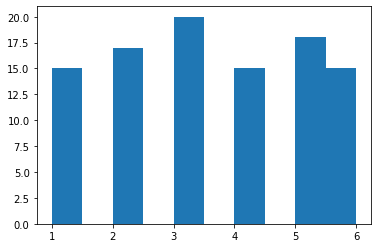

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(dice)
plt.show()

위 그래프를 보면, 마지막이 붙어 있다.
앞에서부터 2개의 값을 선택하여 막대가 그려지는데,
마지막 막대를 그리는 경우, 6 이상을 넘어가지 못하게 되어서 그렇다.
이를 교정하기 위해 0.5부터 시작해서 1씩 증가하도록 bin을 구성하자.
0.5~1.5, 1.5~2.5, ... 7개의 값이 필요하다.

In [23]:
import numpy as np
np.arange(0.5, 7)

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])

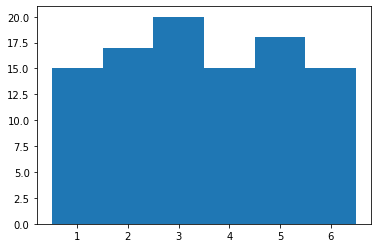

In [22]:
import numpy as np
#bin은 구간. 즉 0.5~1.5 구간에는 14개.
plt.hist(dice, bins = np.arange(0.5, 7))
plt.show()

Pandas로 그려보자.
numpy array를 pandas의 Series로 변환하고, hist() 함수를 사용하면 된다.
Pandas Series는 컬럼이라고 보면 된다. 컬럼을 1차원으로 저장한 값이다. 정수, 문자, 소수 등 어떤 값이든 상관없다.

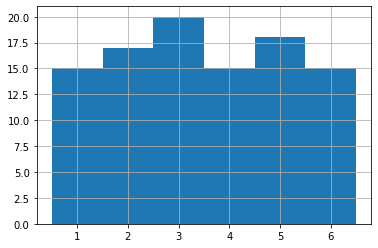

In [25]:
import pandas as pd
pd.Series(dice).hist(bins = np.arange(0.5, 7))

### describe

통계량을 구해보자. describe()는 기술통계 값인 평균, 최소값, 최대값, 표준편차, 건수를 출력한다.
DataFrame 또는 컬럼을 Series로 변환한 후 describe()를 적용할 수 있다.

In [26]:
import pandas as pd

s=pd.Series(dice)

In [27]:
print (s.describe())

count    100.000000
mean       3.490000
std        1.666636
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        6.000000
dtype: float64


또는 문자열에 대해서 통계량을 구해보자.
개수, 키개수 unique, 첫째 값 top, 최빈키의 빈도 freq를 출력하고 있다.

In [29]:
s = pd.Series(['Seoul', 'Seoul', 'Sydney', 'Seoul', 'Hong Kong'])
s.describe()

count         4
unique        3
top       Seoul
freq          2
dtype: object

## 문제: histogram

빈도와 날자가 저장된 데이터에서 막대그래프를 그려보자.
아래 데이터의 첫 컬럼은 빈도, 둘째 컬럼은 날자이다.
막대그래프는 histogram, barchart를 선택할 수 있다.
* histogram은 한 변수(컬럼)의 빈도수.
* barchart는 두 변수간의 그래프.

여기서는 x축에 년도, y축은 빈도를 추출해서 barchart를 그려보자.

In [34]:
data = """0 14-11-2003
1 15-03-1999
12 04-12-2012
33 09-05-2007
44 16-08-1998
55 25-07-2001
76 31-12-2011
87 25-06-1993
118 16-02-1995
119 10-02-1981
145 03-05-2014"""

In [35]:
import datetime

yvalues = []
xdates = []
for line in data.split("\n"):
    x, y = line.split()
    yvalues.append(int(x))
    xdates.append(datetime.datetime.strptime(y, "%d-%m-%Y").date())

bar()는 바의 너비를 말하는데, 기본은 0.8이다.
여기서는 30정도 넣으니 출력이 된다.

<BarContainer object of 11 artists>

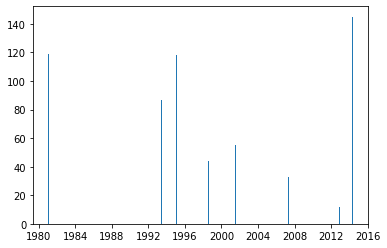

In [54]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
ax.bar(xdates, yvalues, width=30)

## S.5 정규분포



### Sampling

무작위 변수 x가 있다고 하자. x는 정규분포를 따른다고 하며,
평균 $\mu$, 표준편차 $\sigma$를 가지게 된다.
즉, $ X \sim N (\mu, \sigma)$
무작위 수를 생성하는 함수는:
* random.gauss(mu,sigma)
* random.normalvariate(mu,sigma) - gauss보다 약간 빠름.

참고로 다른 분포에서의 샘플링 함수는 다음과 같다.
* random.uniform(a,b)
* random.betavariate(alpha,beta)
* random.expovariate(lamdb)
* random.gammavariate(alpha,beta)


평균 0, 표준편차 1을 가지는 정규분포에서 200개 샘플을 추출해보자.

In [59]:
import numpy as np
comp1=np.random.normal(0, 1, size=200)

200개를 생성하였고, 이 가운데 5개를 출력해보자.

In [57]:
comp1[:5]

array([ 1.64842913, -0.01697313,  1.27238796,  0.03588529,  1.17516446])

In [2]:
comp2=np.random.normal(10, 2, size=200)

### histogram

정규분포에서 무작위 샘플을 추출하는 randn()을 사용해서 histogram 그래프를 그려보자.
정규분포 샘플을 무작위로 100개 생성해보자.

In [61]:
x=np.random.randn(100)

histogram은 bin(interval)과 bin에 속하는 값을 반환한다.
```histogram(x)```를 실행하면 2개의 행렬이 반환된다.

In [63]:
count, binends = np.histogram(x)

반환된 각 빈(간격)에 속한 갯수, 그리고 x축의 간격을 출력해보자.

In [64]:
print(count)
print(binends)

[ 2  0  4 11 18 24 24 12  4  1]
[-3.43964174 -2.81988539 -2.20012905 -1.5803727  -0.96061635 -0.34086
  0.27889635  0.8986527   1.51840905  2.1381654   2.75792174]


numpy의 ```histogram()```은 그래프를 생성하지 않으므로,
그림을 그리려면 ```hist(x)```를 실행한다.

(array([ 2.,  0.,  4., 11., 18., 24., 24., 12.,  4.,  1.]),
 array([-3.43964174, -2.81988539, -2.20012905, -1.5803727 , -0.96061635,
        -0.34086   ,  0.27889635,  0.8986527 ,  1.51840905,  2.1381654 ,
         2.75792174]),
 <a list of 10 Patch objects>)

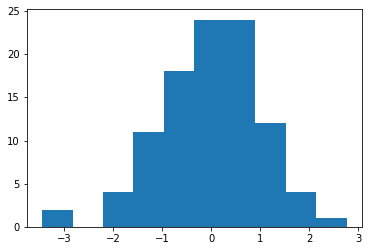

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(x)

Pandas로 hist()를 그려보자.
앞서 생성했던 comp1, comp2를 묶어서 하나의 Series로 만들어 hist()를 호출하고 있다.

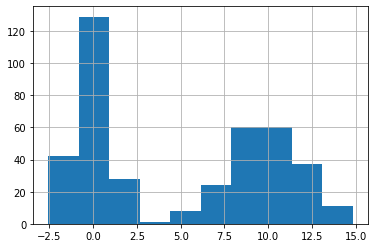

In [7]:
import pandas as pd

values=pd.Series(np.concatenate( [comp1,comp2]))
values.hist()

Pandas의 plot()은 선그래프를 그려준다.

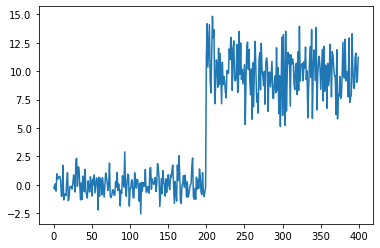

In [8]:
values.plot()
plt.show()

## 3.2 central tendency and spread


**평균 $\mu$, 표준편차 $\sigma$인 무작위 표본 X가 주어지면,** 
예를 들어 모집단이 균등분포라고 하자. 앞서 설명했던 주사위는 1 ~ 6까지 동일한 확률로 발생한다. 주사위를 30회 던져서 표본을 구성해보자. 이를 표본1이라고 하자. 이와 같이 표본을 n회 구성해보자. 그러면 표본1의 평균은 3.51, 표본2는 3.32, 표본3은 3.81..이 될 것이다. 표본을 n회 정도하면, 표본평균의 표본분포 (sampling distribution of sample mean)는 그 형태가 정규분포에 수렴한다.

X의 모집단이 어떤 분포를 따르더라도, n이 커지면 X는 표본평균의 분포는 정규분포로 수렴하게 된다
z값을 이용해 확률을 계산할 수 있고, 그에 따라 통계적 추정을 할 수 있게 된다.

식으로 표현하면:

$$
z = \frac {\bar{x} - \mu_0} {\sigma / \sqrt{n}} \quad x \rightarrow \infty
$$


* standard error
모집단의 표준편차는 알 수가 없다. 따라서 다음과 같이 계산한다. 이때 n이 커지면 보통 30
$ \frac{\sigma} {\sqrt{n}}$

정규분포에서 100개의 수를 생성해보자.

In [3]:
import numpy as np
x=np.random.randn(100)

정규분포는 평균, 모드, 최빈값이 같다.
아래는 평균과 최빈값에 서로 차이가 있다.
정규분포의 솟거나, 퍼진 모양이 다르기 때문이다.

In [4]:
print ("mean\t: {}".format(np.mean(x)))
print ("median\t: {}".format(np.median(x)))

mean	: 0.25807240719208546
median	: 0.17424760805554923


분포의 대칭성을 설명하는 지표로 skewness를 계산한다.
* skewness = 0 : 정규분포
* skewness > 0 : 왼쪽 꼬리가 두툼, 왼쪽으로 비스듬
* skewness < 0 : 오른쪽 꼬리가 두툼, 왼쪽으로 비스듬

In [5]:
from scipy.stats import skew

print ("skewness\t: {}".format(skew(x)))

skewness	: 0.038407737346556746


kurtosis는 분포의 뾰족한 정도를 설명한다.
* = 0 : 정규분포
* > 0 : 뾰족하고, 꼬리가 두툼
* < 0 : 편평하고, 꼬리가 얇음

In [6]:
from scipy.stats import kurtosis

print ("kurtosis\t: {}".format(kurtosis(x)))

kurtosis	: -0.03424153596399471


### Spark로 skewness, kurtosis 계산하기

In [73]:
import os
os.environ["PYSPARK_PYTHON"]="/usr/bin/python3"
os.environ["PYSPARK_DRIVER_PYTHON"]="/usr/bin/python3"

In [74]:
import pyspark

myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

numpy array는 바로 Spark DataFrame을 생성할 수 없으므로,
Pandas를 경유해서 numpy array를 DataFrame으로 생성하자.

In [12]:
import pandas as pd
xPd=pd.DataFrame(x, columns=['x'], dtype=float)

In [13]:
df=spark.createDataFrame(xPd)

In [14]:
from pyspark.sql import functions as f
df.select(f.skewness(df['x']), f.kurtosis(df['x'])).show()

+--------------------+--------------------+
|         skewness(x)|         kurtosis(x)|
+--------------------+--------------------+
|0.038407737346556704|-0.03424153596399693|
+--------------------+--------------------+



## 3.3 variability

spread
    * range
        * IQR Interquartile Range
    * variance
    * standard deviation

```
var의 sqrt는 std
default는 ddof=1(모집단 크기 N을 사용)
표본 n을 사용하려면 ddof=1을 넘겨 준다.

In [53]:
np.std(x)

1.0140797042189178

In [54]:
np.var(x)

1.0283576465087279

In [55]:
np.var(x,ddof=0)

1.0283576465087279

In [56]:
np.sqrt(np.var(x))

1.0140797042189178

In [57]:
np.std(x,ddof=1)

1.019188450426889

In [58]:
np.sqrt(np.var(x,ddof=1))

1.019188450426889

In [59]:
a = np.array([1,2,3,4,5])
p = np.percentile(a, 50) # return 50th percentile, e.g median.
print (p) # 3


3.0


In [ ]:
```
x = df.select(var).toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)
```

### boxplot

IQR의 Q1~Q3을 표시.
pandas를 이용하거나, matplotlib

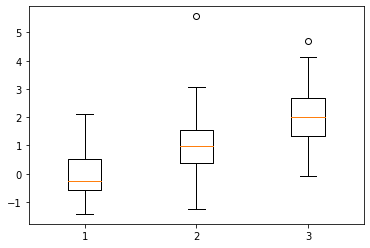

In [60]:
x1 = np.random.normal(0,1,50)
x2 = np.random.normal(1,1,50)
x3 = np.random.normal(2,1,50)
plt.boxplot([x1,x2,x3])
plt.show()


## 3.4 zscore and tscore

zscore는 평균에서 얼마나 떨어져 있는지를 말한다.
정규화(표준화)한다는 정도의 의미가 있다.
즉, z=-0.84일 경우 20%정도에 해당한다.
정규분포일 경우 특정 값의 z값을 말한다.
cdf는 누적확률을 말하는 것으로, cdf(0)은 '0'또는 그 이하의 값을 누적한 확률을 말한다.
평균과 표준편차는 0,1을 기본 값으로 한다.

z는 모집단의 평균, 표준편차를 알 경우, 그러나 샘플링을 할 경우는 
n-1로 나눈다 (numpy에서는 ddof=1이 default).
따라서 아래 계산에서는 ddof=1로 한다. 
표본의 크기가 크면 모집단과 차이가 없는데, 이 경우 표본이 작으면 어떻게 되나..
이 경우 사용하는 것이 t

t값은 
T score is usually used when the sample size is below 30 and/or
when the population standard deviation is unknown.


>>> stats.norm.cdf(-0.84)
0.20045419326044966
>>> stats.norm.cdf(0)
0.5
>>> stats.norm.cdf(1)
0.84134474606854293
>>> stats.norm.cdf(2)
0.97724986805182079 

>>> stats.norm.cdf(2, loc=0.0, scale=1.0)
0.97724986805182079

// 뒤 1은 degree of freedom
>>> stats.t.cdf(1,1)
0.75000000000000022
>>> stats.t.cdf(1,1,loc=0,scale=1)
0.75000000000000022


모집단의 zscore when variance is known
$$
z = \frac {\bar{x} - \mu_0} {\sigma / \sqrt{n}}
$$

모집단의 variance $\sigma^2$를 모르는 경우,
샘플(n < 20 정도)을 구해 그 샘플의 $s^2$를 사용
(과소값을 막기 위해 n-1로 나누는 보정계수 사용)
(n이 적으므로 t값을 사용함!)

```
>>> X
[10, 7, 12, 12, 9, 16, 12, 18, 8, 12, 14, 16]
>>> xbar=mean(X)
>>> sigmax=std(X)
>>> sx=std(X,ddof=1)
>>> xbar
12.166666666666666
>>> sigmax
3.2360813064912666
>>> sx
3.3799766898963113
>>> for x in X:
...   zscore=(x-xbar)/sx
...   print zscore,
... 
 -0.641030061877 -1.52861014755 -0.0493100047598 -0.0493100047598
 -0.936890090435 1.13413010947 -0.0493100047598 1.72585016659
 -1.23275011899 -0.0493100047598 0.542410052357 1.13413010947
>>> stats.zscore(X)
array([-0.66953406, -1.59658123, -0.05150262, -0.05150262, -0.97854978,
        1.18456027, -0.05150262,  1.80259171, -1.28756551, -0.05150262,
        0.56652882,  1.18456027])
>>> for x in X:
...   zscore=(x-xbar)/sigmax
...   print zscore,
... 
 -0.669534063412 -1.59658122814 -0.0515026202625 -0.0515026202625
 -0.978549784987 1.18456026604 -0.0515026202625 1.80259170919
 -1.28756550656 -0.0515026202625 0.566528822887 1.18456026604


```

## 3.5 outliers

정규분포를 따른다고 했을 경우, 분포의 표준편차 범위3은 발생하기 어렵다.
이러한 일정 범위를 넘어선 값은 이상값이다.
따라서, 이런 경우 분석에 앞서 왜 그런 값이 발생했는지 따져보아야 한다.

연구에서는 
* 이상 값의 기준은?
* 이상 값은 얼마나 (왜) 발생했는지?
* 이상 값을 제외하고 나면 서술 통계값은 어떻게 변했는지?
아래의 예에서 
표준편차 2배 보다 큰 경우 이상 값으로 보고, 제외한다.
여기서 서술통계부분을 기술하여 보자.

```
import numpy as np

def reject_outliers(data):
    m = np.mean(data)
    s = np.std(data)
    filtered = [d for d in data if (m - 2 * s < d < m + 2 * s)]
    return filtered

>>> d = [2,4,5,1,6,5,40]
>>> filtered_d = reject_outliers(d)
>>> print filtered_d
[2,4,5,1,6,5]
```

## 문제 S-1:  Kolmogorov-Smirnov 검증

K-S는 데이터가 특정 분포를 따르는지 보는 비모수 추정이다.
귀무가설은 특정분포를 따른다고 설정되어 있고, p-value가 적으면 이를 기각하게 된다.
따라서 p < 0.05라면, 정규분포를 따른다는 귀무가설을 기각하게 된다.

자신의 PC에 복수의 파이썬 2.x, 3.x 버전이 설치되어 있는 경우, 환경변수를 설정해서 실행 경로를 지정해주어야 한다.
환경변수를 다시 설정해주면, Kernel을 재시작해야 한다.

In [2]:
import os
os.environ["PYSPARK_PYTHON"]="/usr/bin/python3"
os.environ["PYSPARK_DRIVER_PYTHON"]="/usr/bin/python3"

In [3]:
import pyspark

In [4]:
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

* mllib 모듈을 사용한다 'pyspark.mllib.stat'

In [4]:
from pyspark.mllib.stat import Statistics

parallelData = spark.sparkContext.parallelize([1.0, 2.0, 5.0, 4.0, 3.0, 3.3, 5.5])

testResult = Statistics.kolmogorovSmirnovTest(parallelData, "norm")
print(testResult)

Kolmogorov-Smirnov test summary:
degrees of freedom = 0 
statistic = 0.841344746068543 
pValue = 5.06089025353873E-6 
Very strong presumption against null hypothesis: Sample follows theoretical distribution.


## 문제 S-3:  평균, 표준편차와 같은 기본 통계 값을 구한다.

### 문제

균등분포 및 정규분포를 무작위로 생성해 기본통계 값을 계산해 보자.

### 해결

무작위는 발생빈도가 어느 쪽에 치우치지 않는다.
Spark에서 무작위로 균등분포 및 정규분포를 생성하고, 기본통계를 계산한다.

### 분포 생성

DataFrame에서 제공하는 통계 기능을 사용해 본다.
컬럼 3개의 DataFrame을 생성한다.
* 첫 컬럼은 'id', SparkSession.range()를 사용한다.
* 무작위 수를 추출해서, 나머지 컬럼 데이터를 만든다. pyspark.sql.functions 함수를 사용한다.
* rand()는 Uniform분포, randn()은 정규분포를 사용한다.

In [5]:
df = spark.range(0,10)
df.show()
df.select('id')

+---+
| id|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
+---+



DataFrame[id: bigint]

통계에 '무작위' 수는 중요하다. 무작위 샘플, 무작위 수를 발생하여 확률에서 빈번하게 사용한다.
**```pyspark.sql.functions```**를 사용하여 생성해 보자.

pyspark.sql.functions | 설명
-----|-----
rand() | 0,1 사이의 균등분포를 생성한다. seed를 넣어서 생성할 수 있다.
randn() | 정규분포를 생성한다. seed를 넣어서 생성할 수 있다.

In [6]:
from pyspark.sql.functions import rand, randn
colUniform = rand(seed=10).alias("uniform")
colNormal=randn(seed=27).alias("normal")
df3=df.select("id", colUniform,colNormal)
df3.show()

+---+-------------------+--------------------+
| id|            uniform|              normal|
+---+-------------------+--------------------+
|  0| 0.1709497137955568| -0.8664700627108758|
|  1| 0.8051143958005459| -0.5970491018333267|
|  2| 0.5775925576589018| 0.18267161219540898|
|  3| 0.9476047869880925| -1.8497305679917546|
|  4|    0.2093704977577|  0.9410417279045351|
|  5|0.36664222617947817| -0.6516475674670159|
|  6| 0.8078688178371882|  0.5901002135239671|
|  7| 0.7135143433452461|  -1.850241871360443|
|  8| 0.7195325566306053| 0.09176896733073023|
|  9|0.31335292311175456|-0.38605118617831075|
+---+-------------------+--------------------+



### 기본 통계

주사위는 이산균등분포의 가장 대표적인 예이다. 각 숫자가 나올 확률은 1/6이다.
정규분포는 평균 0을 중심으로 빈도가 몰려있어 표준편차만큼 퍼진 특징을 가진다.
각 컬럼별로 통계 값을 계산할 수 있다.

In [7]:
df3.describe().show()

+-------+------------------+-------------------+-------------------+
|summary|                id|            uniform|             normal|
+-------+------------------+-------------------+-------------------+
|  count|                10|                 10|                 10|
|   mean|               4.5|  0.563154281910507|-0.4395607836587086|
| stddev|3.0276503540974917|0.27759041858917777| 0.9350726447374764|
|    min|                 0| 0.1709497137955568| -1.850241871360443|
|    max|                 9| 0.9476047869880925| 0.9410417279045351|
+-------+------------------+-------------------+-------------------+



### freqItems()

a, b, c 세 컬럼을 생성한다.
홀수 행이면 1,2,3으로 짝수 행이면 다른 수열로 DataFrame을 생성해 보자.
이 데이터에 대해 60%이상 발생한 행을 출력해 보자.

In [8]:
df=spark.createDataFrame([(1,2,3) if i%2==0 else (i,2*i,i%4) for i in range(100)],["a","b","c"])
df.show(10)

+---+---+---+
|  a|  b|  c|
+---+---+---+
|  1|  2|  3|
|  1|  2|  1|
|  1|  2|  3|
|  3|  6|  3|
|  1|  2|  3|
|  5| 10|  1|
|  1|  2|  3|
|  7| 14|  3|
|  1|  2|  3|
|  9| 18|  1|
+---+---+---+
only showing top 10 rows



임계치 이하의 최빈값을 구할 수 있다.

In [11]:
freq = df.stat.freqItems(["a","b","c"],0.6)
print (freq.show())

+-----------+-----------+-----------+
|a_freqItems|b_freqItems|c_freqItems|
+-----------+-----------+-----------+
|        [1]|        [2]|        [3]|
+-----------+-----------+-----------+

None


### ANOVA

In [3]:
import statsmodels.api as sm

moore=sm.datasets.get_rdataset("Moore","carData")
moore.data.head()

,partner.status,conformity,fcategory,fscore
0,low,8,low,37
1,low,4,high,57
2,low,8,high,65
3,low,7,low,20
4,low,10,low,36


In [4]:
moore.data.columns=['c1','v1','c2','v2']
moore.data.columns

Index(['c1', 'v1', 'c2', 'v2'], dtype='object')

In [5]:
from statsmodels.formula.api import ols
formula='v2~C(c1)*C(c2)'
from statsmodels.stats.anova import anova_lm
model=ols(formula,data=moore.data).fit()
from statsmodels.stats.anova import anova_lm
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(c1),1.0,7.932587,7.932587,0.231555,6.330623e-01
C(c2),2.0,7561.365635,3780.682818,110.359336,8.768957e-17
C(c1):C(c2),2.0,29.086807,14.543403,0.424527,6.570656e-01
Residual,39.0,1336.059416,34.257934,NaN,NaN


In [ ]:
통계적 학습이란 데이터를 분석하여 의미를 찾는 방법을 말한다.
* supervised (입력은 있지만 출력이 없는)
* unsupervised (입력 출력

In [6]:
import pandas as pd

auto = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Auto.csv")
auto.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 76, saw 3


In [ ]:
adv=pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')
adv.head()

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
plt.scatter(adv.TV,adv.Sales)
plt.show()

## Chi Square

In [76]:
Vectors.dense(207, 282)

DenseVector([207.0, 282.0])

In [75]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import ChiSquareTest

data = [(0.0, Vectors.dense(207, 282)),
        (1.0, Vectors.dense(231, 242))]
df = spark.createDataFrame(data, ["label", "features"])

r = ChiSquareTest.test(df, "features", "label").head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))

pValues: [0.157299207050285,0.157299207050285]
degreesOfFreedom: [1, 1]
statistics: [2.0,2.0]


## S.10 상관관계

상관관계는 변수 간에 서로 어떤 관계가 있는지, 그 변화의 **방향**, **강도**를 나타낸다.
연속 변수들이 서로 커지거나 작아지거나 하는 의미를 관계를 표현한다.
**명목변수**와의 상관관계는 의미가 없다.

단, 서로 상관관계가 있다고 해서 인과관계가 있다는 의미는 아니다.
키와 몸무게가 서로 상관관계가 있다고 하자.
키가 원인이 되어서 몸무게가 결과로 올라간다고 가정해서는 안된다는 것이다.

**맥주**와 **선풍기**의 매출은 서로 상관관계가 있다.
그렇다고 해서 선풍기의 매출이 원인이 되어 맥주의 매출을 올린 것은 아니다.
더워져서 선풍기와 맥주의 매출이 올라간 것으로 이해해야 한다.
또 **교통상황**과 **약속지체**는 상관관계가 있다.
교통이 막히면 약속이 늦어지는 것은 맞다.
그렇다고 해서 약속이 늦어진다고 교통이 막히는 것은 아니다.


### S.10.1 상관관계 방향과 강도

* $+$ 변수가 서로 같은 방향으로 변동, 숫자가 클수록 강도가 크며 반대로 적을수록 적다.
* 0 변수가 서로 영향을 주지 않음
* $-$ 변수가 서로 다른 방향으로 변동

### S.10.2 그래프

#### 데이터 생성

변수들이 서로 어떤 관계를 가지고 있는지 그래프를 그려보면 쉽게 파악할 수 있다.
우선 임의로 X, Y 데이터를 생성하고, 그래프에서 서로 어떻게 변화하는지 알아보자.

In [ ]:
X=[10,7,12,12,9,16,12,18,8,12,14,16]
Y=[6,4,7,8,10,7,10,15,5,6,11,13]

#### 단순 Plot

```matplotlib``` 라이브러리를 사용하여 X, Y 그래프를 그려보자.
```%mathplotlib inline```는 노트북에서 그래프를 바로 아래 출력창에 띄운다.
이 명령어가 없으면 별도의 창을 열어서 띄우게 된다.
* ```plot()```은 X, Y 데이터를 입력하고, ```go```는 green색으로 빈동그라미 ```o```로 표시하게 된다.
* ```title()```은 제목을 적는 함수이고, 유니코드 지원이 되지 않아서 제목에 한글을 쓸 수는 없다. 
* ```ylabel()```은 y축 명을 적는 기능이다.

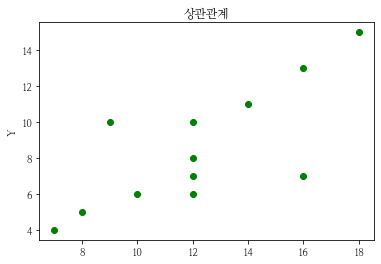

In [6]:
%matplotlib inline

from matplotlib import pyplot as plt

plt.title('상관관계')
plt.plot(X, Y, 'go')
plt.ylabel('Y')

plt.show()


### Scatter

* ```subplots()``` 명령어의 인자로 넣는 수는 행, 열로 그래프의 바둑판 위치를 의미한다.
예를 들어, 인자 ```1,1```은 1행, 1열을 ```1,2```는 1행, 2열을 의미한다.
이 명령어는 Figure와 Axes를 반환해서, 그림의 설정을 변경할 수 있다.
* ```set_minor_locator()```는 '사이 구분자'를 설정할 수 있고, AutoMinorLocator(3)은 구분자 2개를 ```AutoMinorLocator(5)```는 큰 구분자들 사이 구분자 4개를 넣으라는 의미이다.
* grid() 명령어는 격자선을 설정한다. b=True는 그리드 선을 표시하라는 의미, which는 'major', 'minor', 'both' 가운데 하나를 설정한다.


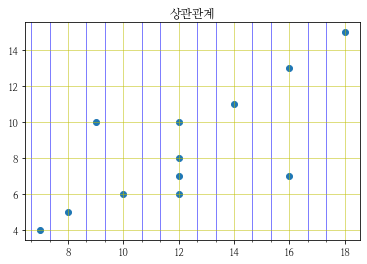

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
plt.rc('font', family='NanumMyeongjo')
ax.title.set_text('상관관계')
ax.scatter(X, Y)
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator(1))
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator(3))
ax.grid(b=True, which='major', color='y', linewidth=0.5)
ax.grid(b=True, which='minor', color='b', linewidth=0.5)
#fig.show()

### S.10.3 상관관계 식

상관관계는 공분산 covariance를 표준편차의 곱으로 나눈 값으로 계산한다.

$$
r_{(x,y)} = \frac {cov(x,y)} {s_x s_y}
$$

$$
cov(x,y)=\frac{ \sum\limits_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y} ) }
                       {n-1}
$$

### S.4.2 데이터

임의로 X, Y 데이터를 생성해보자

In [3]:
X=[2.1,2.5,4.0,3.6]
Y=[8,12,14,10]

X=[10,7,12,12,9,16,12,18,8,12,14,16]
Y=[6,4,7,8,10,7,10,15,5,6,11,13]

### S.4.3 평균 계산

공분산을 구하려면 평균 $\bar{x}$, $\bar{y}$를 구해야 한다.

#### 평균 계산식

평균을 x의 합계를 개수로 나누어 계산해보자. numpy 평균과 동일하다.

In [40]:
print ("simple mean of X = {:.3f}".format(float(sum(X))/len(X)))

simple mean of X = 12.167


#### numpy 평균

numpy의 평균을 계산해보자.

In [41]:
import numpy as np

xbar=np.mean(X)
ybar=np.mean(Y)

In [42]:
print ("numpy mean of X = {:.3f}".format(xbar))

numpy mean of X = 12.167


### S.4.4 분산 계산

상관관계는 공분산을 표준편차로 나누어 주어야 한다.
분산 variance나 표준편차 Standard Deviation은 **평균으로부터 얼마나 멀리 떨어져 또는 흩어져 분포**하는지 알려주는 값이다. 
* 분산은 평균에서 관측값을 뺀 차이값을 제곱하여 평균을 계산한다. 제곱을 하지 않고 차이값을 더하면 0이 나오므로 제곱을 한다.
* 분산을 제곱근하면 표준편차가 된다.

분산보다는 표준편차가 더 자주 사용된다.

#### 분산 계산식

수식으로 분산을 계산을 해보자.
무작위로 x값을 고르게 되는 경우, n-1로 나누어주어 보정해주어야 한다.

In [45]:
print(np.sqrt(sum( [ (x-xbar)**2 for x in X ] )/len(X))) # ddof=0

3.2360813064912666


n-1 보정을 해주어서 분산을 계산하면 다음과 같이 미세하게 값이 증가한다.

In [47]:
print(np.sqrt(sum( [ (x-xbar)**2 for x in X ] )/(len(X)-1))) # ddof=1

3.3799766898963113


표준편차는 variance의 제곱근으로 계산한다.

ddof는 Delta Degrees of Freedom으로, 기본 값은 ddof=0이지만, 1로 해서 계산한다.

In [48]:
sx=np.sqrt(np.var(X,ddof=1))
sy=np.sqrt(np.var(Y,ddof=1))
print("sx:",sx, "sy:",sy)

sx: 3.3799766898963113 sy: 3.3439225741362764


#### numpy 분산계산

numpy로 계산해도, 값은 동일하다.

In [49]:
print(np.std(X)) # ddof=0
print(np.std(X, ddof=1))

3.2360813064912666
3.3799766898963113


### S.4.5 numpy 공분산 계산

#### 공분산 계산식

라이브러리를 사용하지 않고, 공분산을 계산해보자.
공분산의 부호는 두 변수가 같은 방향, 다른 방향으로 움직이는지 보여준다.
공분산이 '0'이라면 두 변수가 독립적이란 의미이다.
크기는 해석하기 어렵다.

In [28]:
covxy=sum( [ (x-xbar)*(y-ybar) for x,y in zip(X,Y) ]) / (len(X)-1)
print ("simple cov=", covxy)

simple cov= 8.454545454545455


#### numpy 공분산

numpy로 공분산을 계산해보자. 앞에서의 계산과 동일한 결과를 출력한다.
numpy 공분산은 계산하면 x,y 컬럼에 대한 2 x 2 값을 출력한다.
공분산값은 x와 y 컬럼이 교차하는 값이다.

In [30]:
print ("np cov=\n",np.cov(X,Y))

np cov=
 [[11.42424242  8.45454545]
 [ 8.45454545 11.18181818]]


서로 x와 x컬럼이 만나는 값은, 자신에 대한 공분산을 계산한 값으로 ```sum( (x-mean(x))**2) / (n-1)```,
x대신 y를 대입하면 나머지 값이 계산된다.
계산해보자.

In [50]:
print (np.sum( (X-np.mean(X))**2) / (len(X)-1))
print (np.sum( (Y-np.mean(Y))**2) / (len(Y)-1))

11.424242424242424
11.181818181818182


위 값을 관찰하면, variance 값과 계산식이 동일하다.

In [29]:
print(np.var(X, ddof=1))

11.4242424242


자신에 대한 공분산을 계산하면 동일한 값을 출력한다.

In [51]:
print ("npcov of X", np.cov(X)) #sum( [ (x-xbar)**2 for x in X ])/(len(X)-1)
print ("npcov of Y", np.cov(Y))

npcov of X 11.424242424242426
npcov of Y 11.181818181818182


### S.4.6 상관관계

상관관계는 공분산을 표준편차의 곱으로 나누어서 계산한다.

#### numpy 계산
앞서 계산했던 식을 기억하고, 그 값을 가져온다.

In [52]:
import numpy as np

xbar=np.mean(X)
ybar=np.mean(Y)
sx=np.sqrt(np.var(X,ddof=1))
sy=np.sqrt(np.var(Y,ddof=1))
covxy=sum( [ (x-xbar)*(y-ybar) for x,y in zip(X,Y) ]) / (len(X)-1)

In [53]:
rxy=covxy/(sx*sy)
print ("corr: ",rxy)

corr:  0.7480322896763185


#### 상관관계 계산식

위 계산식을 모두 한꺼번에 넣어, 계산해보자.

In [33]:
import math
numer = sum ( [ x*y for x,y in zip(X,Y) ] ) - len(X) * (xbar * ybar)
denom = math.sqrt( (sum( [ x*x for x in X ]) - len(X) * xbar**2) * ( sum( [ y * y for y in Y ]) -len(X) * ybar**2))
print(numer/denom)

0.7480322896763182


### S.4.7 scipy

scipy 라이브러리를 사용하여 pearson 상관관계를 계산해보자.
상관관계는 앞서 계산과 동일하며, 양측 확률이 같이 출력되고 있다 (two-tailed p-value).

In [34]:
import scipy.stats as stats
print (stats.pearsonr(X,Y))
#(0.66257388220302893, 0.33742611779697101)

(0.7480322896763183, 0.0051443764140137495)


### S.4.8 zscore를 이용한 상관관계

상관관계는 $$ \sum \frac{z_x . z_y} {N} $$
N은 x,y가 쌍이므로 어느 한 변수의 size를 택해도 같다.

negative란 한 변수가 높을 때 (postive z score) 다른 변수가 낮은 값 (negative z
score)을 갖는 것으로 곱하면 음수가 되게 된다.

* 인과관계를 내포하고 있기는 하지만, 인과관계는 아니다.
담배와 암의 상관관계의 상관관계 높다. 그리고 담배가 암을 유발하는 관계. 그러나
이러한 방향을 말해주는 것은 아니다.
* 선형

어떤 경우에 유의미적?

In [58]:
numer =  sum ( [ ( (x-np.mean(X))/np.std(X) ) * ( (y-np.mean(Y))/np.std(Y) ) for x,y in zip(X,Y) ] )

print(f"분자: {numer}")

In [63]:
print(sum (stats.zscore(X) * stats.zscore(Y)))

8.97638747611582


In [64]:
print(sum (stats.zscore(X) * stats.zscore(Y))/len(X))

0.7480322896763183


## S.5 함수로 만들어 보기

위를 함수로 만들어 보자.
평균을 계산하려면 모든 값을 합계해야 하고, 그러려면 반복문이 필요하다.
표준편차는 평균값과 같은 반복문에서 계산할 수 없는데, 그 이유는 평균값이 있어야만 표준편차를 계산할 수 있다.
간단한 평균, 표준편차를 라이브러리 없이 계산하려면 반복문의 통제가 필요하겠다.

라이브러리를 사용하면 반복문이 없이 간편하게 함수호출로 가능해지게 된다.

In [65]:
import math
numer = sum ( [ x*y for x,y in zip(X,Y) ] ) - len(X) * (xbar * ybar)
denom = math.sqrt( (sum( [ x*x for x in X ]) - len(X) * xbar**2) * ( sum( [ y * y for y in Y ]) -len(X) * ybar**2))
print(numer, denom, numer/denom)

93.0 124.32618388738557 0.7480322896763182


In [66]:
numer=np.sum(np.array(X)*np.array(Y)) - len(X)*np.mean(X)*np.mean(Y)
denom1=np.sum(np.array(X)*np.array(X)) - len(X)*np.power(np.mean(X),2)
denom2=np.sum(np.array(Y)*np.array(Y)) - len(Y)*np.power(np.mean(Y),2)
denom=np.sqrt(denom1*denom2)
print(numer,denom,numer/denom)

93.0 124.32618388738557 0.7480322896763182


In [67]:
def pearson(X,Y):
    numer=np.sum(np.array(X)*np.array(Y)) - len(X)*np.mean(X)*np.mean(Y)
    denom1=np.sum(np.array(X)*np.array(X)) - len(X)*np.power(np.mean(X),2)
    denom2=np.sum(np.array(Y)*np.array(Y)) - len(Y)*np.power(np.mean(Y),2)
    denom=np.sqrt(denom1*denom2)
    #print(numer,denom,numer/denom)
    r=1 if denom==0 else numer/denom
    return r

In [68]:
pearson(X,Y)

0.7480322896763182

## S.6 상관관계 표

numpy의 np.corrcoef 함수를 사용할 수 있다.

In [69]:
import numpy as np

a=np.array([0.1, .32, .2, 0.4, 0.8])
b=np.array([.23, .18, .56, .61, .12])
c=np.array([.9, .3, .6, .5, .3])
d=np.array([.34, .75, .91, .19, .21])

a,b는 -0.352, a,c는 -0.747, a,d는 -0.489
b,c는 0.238 등 열과 행으로 각 변수의 상관관계 표를 읽을 수 있다.

In [70]:
np.corrcoef([a,b,c,d])

array([[ 1.        , -0.35153114, -0.74736506, -0.48917666],
       [-0.35153114,  1.        ,  0.23810227,  0.15958285],
       [-0.74736506,  0.23810227,  1.        , -0.03960706],
       [-0.48917666,  0.15958285, -0.03960706,  1.        ]])

### scipy.stats



In [ ]:
xx=np.random.normal(0,1,100)
yy=np.random.normal(0,1,100)

Pearson 상관관계는 두 변수의 선형관계를 측정한다.
두 변수는 정규분포를 따르는 것으로 가정한다.
앞은 상관관계를 말하고, 그 다음 값은 p-value이다.

In [36]:
print stats.pearsonr(xx,yy)

(-0.014953544678355404, 0.88260821551981983)


비모수추정 상관관계를 말한다. 두 변수가 정규분포를 따르지 않는 경우에 사용한다.

In [37]:
stats.spearmanr(xx,yy)

SpearmanrResult(correlation=-0.013321332133213319, pvalue=0.89534472782901031)

등위에 의한 상관관계를 계산한다.
1938년 이를 개발한 Maurice Kendall의 이름을 따서 붙였다.

In [38]:
stats.kendalltau(xx,yy)

KendalltauResult(correlation=-0.0068686868686868739, pvalue=0.91934726886031781)

In [39]:
x = [5.05, 6.75, 3.21, 2.66]
y = [1.65, 26.5, -5.93, 7.96]
z = [1.65, 2.64, 2.64, 6.95]

In [40]:
stats.spearmanr(x,y)
#(0.39999999999999997, 0.59999999999999998)

SpearmanrResult(correlation=0.39999999999999997, pvalue=0.59999999999999998)

In [41]:
stats.spearmanr(x,z)
#(-0.63245553203367588, 0.36754446796632423)

SpearmanrResult(correlation=-0.63245553203367599, pvalue=0.36754446796632401)

In [42]:
stats.kendalltau(x,y)
#(0.33333333333333331, 0.49690585901477358)

KendalltauResult(correlation=0.33333333333333331, pvalue=0.49690585901477358)

In [43]:
stats.kendalltau(x,z)
#(-0.54772255750516619, 0.26428835793500238)

KendalltauResult(correlation=-0.54772255750516619, pvalue=0.26428835793500238)

## S.7 Iris

두 변수의 공분산을 표준편차로 나눈 값
the covariance of the two variables divided by the product of their standard deviations.

standardize 표준화란 각 점수를 평균에서 빼고난 후 표준편차로 나누는 것.

$$
   r = \frac{\sum\limits_{i=1}^n (X_i - \bar{X})(Y_i -
   \bar{Y})}{\sqrt{\sum\limits_{i=1}^n (X_i - \bar{X})^2} \sqrt{\sum
   \limits_{i=1}^n (Y_i - \bar{Y})^2}}
$$

## 데이터

Iris 데이터
https://archive.ics.uci.edu/ml/machine-learning-databases/iris/

In [29]:
import pandas as pd

file_name = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(file_name, names=["sepal_length","sepal_width","petal_length", "petal_width","species"])

In [30]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
iris1 = sns.load_dataset("iris")
iris1.head()
iris1.count()
iris1.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## statsmodels

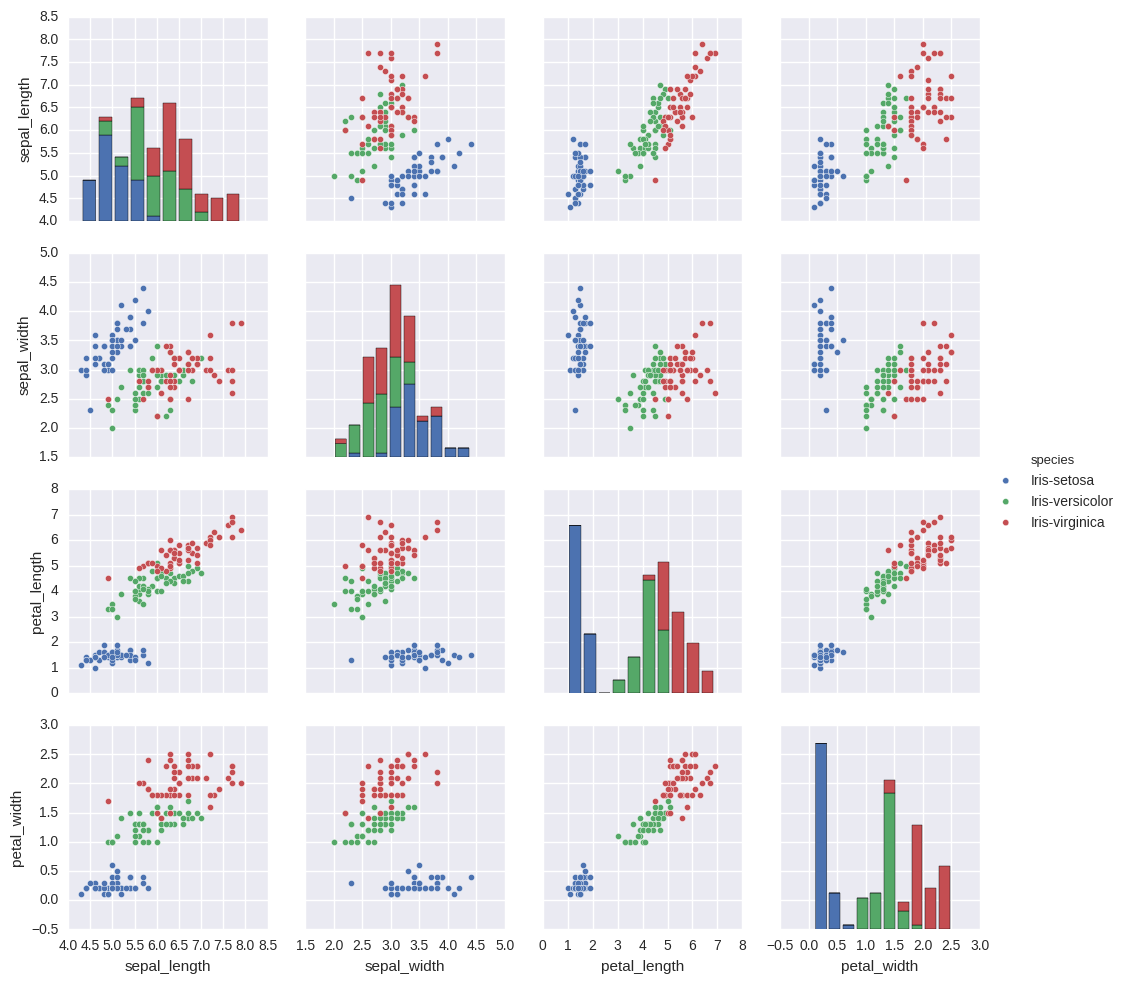

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

#without regression
sns.pairplot(aa, kind="scatter", hue="species")
plt.show()

## spark

In [138]:
import os
import sys 
os.environ["SPARK_HOME"]=os.path.join(os.environ['HOME'],'Downloads','spark-2.0.0-bin-hadoop2.7')
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

In [139]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

### 상관관계

* 무작위 수 2 컬럼을 만들어, 상관관계를 계산한다.
* 자신과의 상관관계는 당연히 1.0이 된다.
* spark의 ```rand()``` 함수는 ```pyspark.sql.functions``` 모듈에서 제공된다.

In [6]:
from pyspark.sql.functions import rand
df = spark.range(0, 10).withColumn('rand1', rand(seed=10)).withColumn('rand2', rand(seed=27))
print (df.stat.corr('rand1', 'rand2'))
print (df.stat.corr('id', 'id'))

0.13506684062243296
1.0


Pearson’s Correlation - 정규분포인 경우
Spearman’s Correlation - 정규분포가 아닌 경우

In [7]:
from pyspark.mllib.stat import Statistics
corr_mat=Statistics.corr(features, method="pearson")

NameError: name 'features' is not defined

In [ ]:
corr_mat=Statistics.corr(features, method="spearman")